### Testing Model Assumptions Example 2.4
On the left-hand panel of the Figure the scatter plot for the **Advertising** data set is displayed. The right-hand panel displays the corresponding Tukey-Anscombe plot.

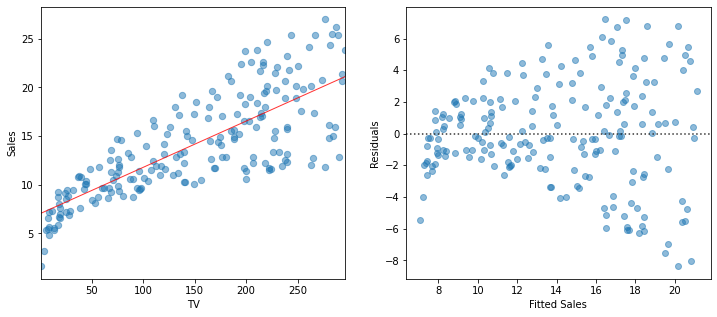

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

""" Find Predictions and Residuals """
# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Predict values based on the fit.
ypred = model.predict(x_sm)
# Residuals of the model
res = model.resid

""" Plots """
# Create figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
# Plot data and regression
sns.regplot(x=x, y=y, 
            scatter=True, ci=False, lowess=False, 
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Set Labels
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

# Plot Residuals
ax2 = fig.add_subplot(122)
df = pd.concat([yfit, res], axis=1)
sns.residplot(x=yfit, y=res, data=df, 
              lowess=False, scatter_kws={'alpha': 0.5})
ax2.set_xlabel('Fitted Sales')
ax2.set_ylabel('Residuals')

# Show plots
plt.show()

We observe that the regression line on the left-hand panel corresponds to the horizontal axis on the right-hand panel of the Figure. We now can easily read off the values of the residuals for every predicted value $ \hat{y}_{i} $.

In [7]:
import numpy as np
np.sqrt(model.mse_resid)

3.258656368650463

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.47e-42
Time:                        16:44:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing Model Assumptions Example 2.5
How can we decide on the basis of the Tukey-Anscombe plot whether the model assumption 
$ E (\epsilon_{i})=0 $ is fulfilled? To visualize the relation between the residuals $ r_{i}$ and the predicted response values $\hat{y}_{i}$, we will take advantage of the *smoothing approach*. 

In the following, we will roughly illustrate  the principle of the smoothing approach. A simple yet intuitive smoother is the *running mean*. It involves taking a fixed window width on the $ \hat{y} $-axis, and compute the mean of the $ r $-values of all the observations that fall into this window. This value then is the estimate for the function value at the window center. The left-hand panel of the Figure below displays two thin stripes : the average of all residuals falling into such a stripe is calculated and is plotted as a red point at the center of the corresponding stripe. If the stripes are sliding along the $ \hat{y} $-axis, connecting the red points for every window position then results in the red curve displayed in the right-hand panel of Figure below. 


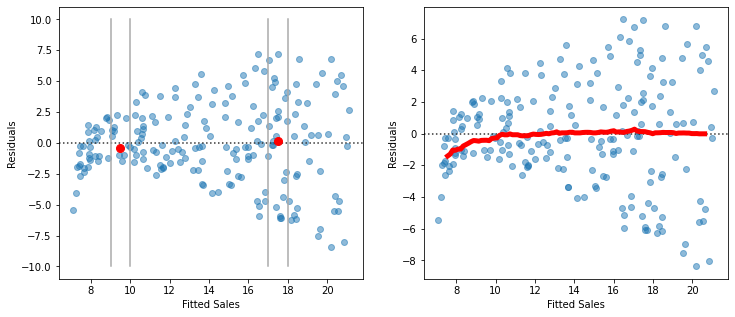

In [10]:
# This example builds on onto Example 2.4
import numpy as np

""" Plots """
# Create Figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)

# Visualize Moving average:
# Plot Residuals
sns.residplot(x=yfit, y=res, data=df, 
              lowess=False, scatter_kws={'alpha': 0.5})
# Plot vertical lines and average to visualize moving average
bandwidth = 0.5

for x_avg in [9.5, 17.5]:
    # Find indices where ypred is within range
    index_res = (np.where(ypred > (x_avg - bandwidth)) and 
                 np.where(ypred < (x_avg + bandwidth)))
    # Find mean of Residuals
    res_mean = res[index_res[0]].mean()
    # Plot lines
    plt.plot((x_avg-bandwidth, x_avg - bandwidth ), 
             [-10, 10], color='darkgrey')
    plt.plot((x_avg+bandwidth, x_avg + bandwidth ), 
             [-10, 10], color='darkgrey')
    # Plot average
    plt.plot(x_avg, res_mean, color='red', marker='o', markersize=8)

# Set labels
ax1.set_xlabel('Fitted Sales')
ax1.set_ylabel('Residuals')

# Find moving average over full domain
# create x vector
x_avg = np.linspace(ypred.min() + bandwidth, 
                    ypred.max() - bandwidth, 100)
res_mean = []
for x_ in x_avg:
    # Find indices where ypred is within range
    index_res = (np.where(ypred > (x_ - bandwidth)) and 
                 np.where(ypred < (x_ + bandwidth)))
    # Find mean of Residuals
    res_mean.append(res[index_res[0]].mean())

# Second subplot:
ax2 = fig.add_subplot(122)
# Plot Residuals
sns.residplot(x=yfit, y=res, data=df, 
              lowess=False, scatter_kws={'alpha': 0.5})
# Plot moving average:
plt.plot(x_avg, res_mean, 'r-', linewidth=5)
# Set labels
ax2.set_xlabel('Fitted Sales')
ax2.set_ylabel('Residuals')

# Show plot
plt.show()